In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [5]:
fashion_mnist=datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [6]:
type(train_images)

numpy.ndarray

In [7]:
type(test_images)

numpy.ndarray

In [8]:
print(len(train_images))

60000


In [9]:
print(len(test_images))

10000


In [10]:
print(train_images[0].shape)

(28, 28)


In [11]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

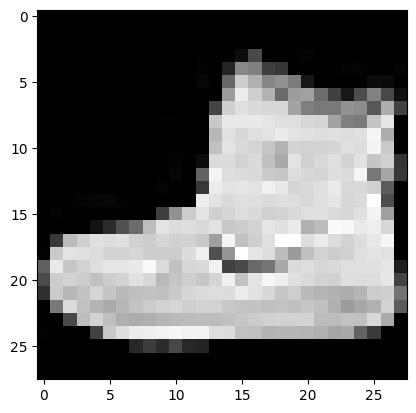

In [12]:
#show image
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [13]:
#pixel values are between 0 and 255. Normalize it to 0 and 1
train_images, test_images= train_images/255.0, test_images/255.0

In [15]:
train_images=train_images.reshape((train_images.shape[0],28,28,1))
test_images=test_images.reshape((test_images.shape[0],28,28,1))
#note: graysacale images are 1 and rgb images are 3


In [16]:
train_images.shape

(60000, 28, 28, 1)

In [18]:
#build the convolutional base
model= models.Sequential() #stacking layers ontop of other
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))#32 filters
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))#64 filters
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))



In [20]:
#compile and train the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
#model training
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.4845 - accuracy: 0.8227 - val_loss: 0.3641 - val_accuracy: 0.8697
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3131 - accuracy: 0.8867 - val_loss: 0.3134 - val_accuracy: 0.8875
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2665 - accuracy: 0.9028 - val_loss: 0.3012 - val_accuracy: 0.8933
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2388 - accuracy: 0.9122 - val_loss: 0.2678 - val_accuracy: 0.9013
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2173 - accuracy: 0.9193 - val_loss: 0.2744 - val_accuracy: 0.9011


In [22]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("\n",test_acc)

313/313 - 1s - loss: 0.2744 - accuracy: 0.9011 - 611ms/epoch - 2ms/step

 0.9010999798774719


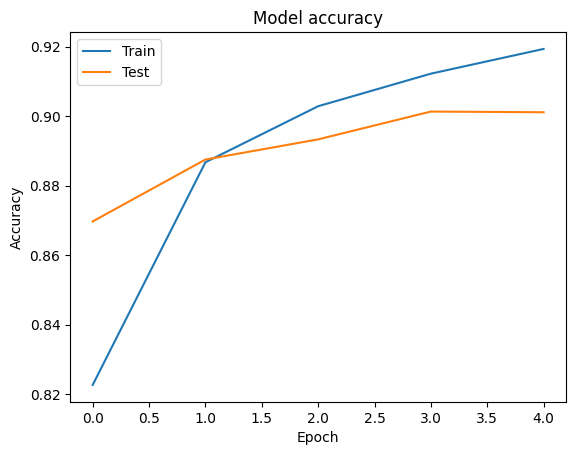

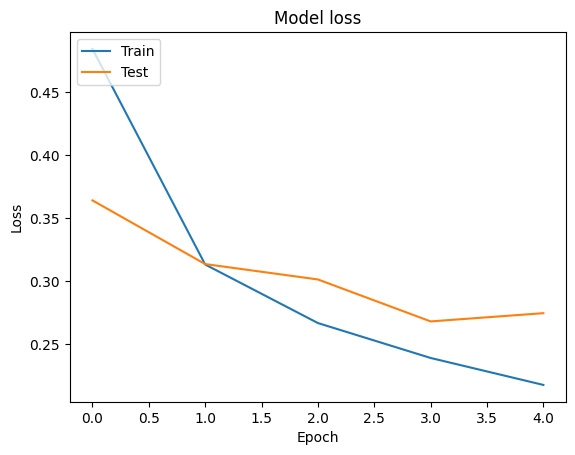

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
